In [ ]:
from notebooks import *
sg.init(app=None)

INFO     [14:19:17.795] [93573]  52 logging_/init_logging: {logging_yaml: None}

INFO     [14:19:18.077] [93573]  29 api.server_globals/init

INFO     [14:19:18.628] [93573]  31 api.server_globals/init: done

In [ ]:

def opt(*args, **kwargs):
    verbose_keys = ['cache', 'audio']
    verbose(*args, **{k: v for k, v in kwargs.items() if k in verbose_keys})
    par(**{k: v for k, v in kwargs.items() if k not in verbose_keys})

def par(**kwargs):
    """
    Usage:
        par(use=None)                         # No par, no progress bars (easier to see audio read/write and cache hit/miss)
        par(use='sync')                       # No par, cooperative progress bars (no lines printing over each other)
        par(use='dask', scheduler='threads')  # Par, uncooperative progress bars (lines print over each other)
    """
    progress_kwargs(override=kwargs)

def verbose(
    both=None,       # Shorthand, e.g. verbose('warn') = verbose(cache='warn', audio='warn')
    *,
    cache='debug',   # Show cache hit/miss lines # WARNING Frequent hangs during bigger xc_similar_html calls...
    # cache='info',  # Show cache hit/miss chars # WARNING (same)
    # cache='warn',  # Quiet
    audio='debug',   # Show read/write
    # audio='info',  # Show write
    # audio='warn',  # Quiet
):
    if both:
        cache = both
        audio = both
    memory.log.level = cache
    log_levels({'load': audio.upper()})

def n_recs_by_sp_quality(df):
    return (df
        # Count recs by (species, quality)
        .pipe(df_remove_unused_categories)
        .assign(n=1).groupby(['species', 'quality']).n.sum().reset_index()
        # Strip and restore .species cat around .pivot_table to workaround category error when adding .total
        .pipe(df_cat_to_str)
        # Pivot
        .pivot_table(index='species', columns='quality', values='n', fill_value=0, aggfunc='sum',
            margins=True, margins_name='total',  # FIXME 'total' ends up as NaN because we cat .species
        )
        # Restore .species cat
        .reset_index().astype({'species': metadata.species.df.shorthand.dtype}).sort_values('species').set_index('species')
        # Drop columns.name from .pivot_table ('quality')
        .T.pipe(df_set_index_name, None).T
        # Add .total
        # .pipe(df_assign_first, total=lambda df: df.sum(axis=1))
        .pipe(df_reorder_cols, first=['total'])
        # Sort
        .sort_values('total', ascending=False)
    )

In [ ]:
# How many recs per (species, quality)?
(sg.xc_meta
    # [lambda df: df.species.isin(['SNGO', 'HOFI', 'GWTE', 'YHBL'])]  # Faster dev
    .pipe(n_recs_by_sp_quality)
    .iloc[:20]
)

total      A      B     C     D    E  no score
species                                                
NaN      35233  12109  14928  5434  1168  301      1293
RECR       659     94    281   209    63   12         0
SOSP       648    251    246   116    19    8         8
BEWR       522    168    252    69     3    0        30
SPTO       521    234    198    70     8    2         9
FOSP       501    267    153    59    14    1         7
RWBL       497    142    247    79    19    5         5
HOWR       476    163    219    55    13    2        24
AMRO       443    140    205    75    12    8         3
NOCA       407    128    182    71    15    6         5
SWTH       392    124    165    69    19    5        10
DEJU       392    136    150    68    11    3        24
WAVI       372     98    160    86    21    4         3
COYE       352    114    162    51     9    5        11
WTSP       348     71    198    54    14    5         6
CBTH       334    109    157    55     4    2         7
GRCA       303     83    147    56    12    5         0
WBNU       303     54    157    55    12    0        25
MAWR       290     91    150    34     8    4         3
WCSP       290     97    127    41     6    3        16

to_paths_sliced: [

] |   0% (1) |  0.0s

to_paths_sliced: [

#################################################################################

] | 100% (1) |  0.1s

audio_metadata: [

] |   0% (1) |  0.0s

audio_metadata: [

##################################################################################

] | 100% (1) |  0.1s

feat: [

] |   0% (1) |  0.0s

feat: [

############################################################################################

] | 100% (1) |  0.1s

to_paths_sliced: [

] |   0% (32) |  0.0s

to_paths_sliced: [

################################################################################

] | 100% (32) |  0.1s

audio_metadata: [

] |   0% (32) |  0.0s

audio_metadata: [

#################################################################################

] | 100% (32) |  0.1s

feat: [

] |   0% (32) |  0.0s

feat: [

###########################################################################################

] | 100% (32) |  0.1s

f: [

] |   0% (33) |  0.0s

f: [

##############################################################################################

] | 100% (33) |  0.1s

d_f2: [

] |   0% (33) |  0.0s

d_f2: [

###########################################################################################

] | 100% (33) |  0.1s

d_fc: [

] |   0% (33) |  0.0s

d_fc: [

###########################################################################################

] | 100% (33) |  0.1s

p: [

] |   0% (33) |  0.0s

p: [

##############################################################################################

] | 100% (33) |  0.1s

d_p2: [

] |   0% (33) |  0.0s

d_p2: [

###########################################################################################

] | 100% (33) |  0.1s

d_pc: [

] |   0% (33) |  0.0s

d_pc: [

###########################################################################################

] | 100% (33) |  0.1s

audio: [

] |   0% (10) |  0.0s

audio: [

#########                                                                                 

] |  10% (10) |  0.1s

audio: [

##########################################################################################

] | 100% (10) |  0.2s

spectro: [

] |   0% (10) |  0.0s

spectro: [

########################################################################################

] | 100% (10) |  0.1s

plot_slice: [

] |   0% (10) |  0.0s

plot_slice: [

] |   0% (10) |  0.1s

plot_slice: [

########                                                                             

] |  10% (10) |  0.3s

plot_slice: [

############################################################################         

] |  90% (10) |  0.4s

plot_slice: [

#####################################################################################

] | 100% (10) |  0.5s

xc                                                                                                          xc_id                                                  d_slp                                                  d_f2                                                    d_p2                                                    d_fc                                                   d_pc                                                                                                                                         species                                                      slice quality                                                                  date_time                                     type    subspecies              background_species                                                      recordist elevation                                                                                                                                                                                                    place                                                                                                                                                                                                  remarks bird_seen playback_used  duration_s
0  \n                    <a href="https://www.xeno-canto.org/381417">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=381417) }}">381417</a>\n                  <a href="{{ req_query_with(sort='d_slp') }}" >0.0</a>  <a href="{{ req_query_with(sort='d_f2') }}" >0.0</a>    <a href="{{ req_query_with(sort='d_p2') }}" >0.0</a>    <a href="{{ req_query_with(sort='d_fc') }}" >0.0</a>   <a href="{{ req_query_with(sort='d_pc') }}" >0.0</a>  \n                    <a href="{{ req_href('/recs/xc/species')(species='YHBL') }}" title="Yellow-headed Blackbird" >YHBL</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       A     \n                2017-06-03<br/>\n                10:37\n                            df_cell_str(value='song')                         df_cell_str(value='')         \n                Sue Riffe<br/>by-nc-sa\n                2000 m  df_cell_str(value='\n                Carpenter Ranch, Routt County, Colorado, United States<br/>\n                <a href="https://www.google.com/maps/place/40.4797,-107.1399/@40.4797,-107.1399,6z...                                                                                                                             df_cell_str(value='Natural vocalization from cattails around a small pond.')       yes            no       3.065
1  \n                    <a href="https://www.xeno-canto.org/293877">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=293877) }}">293877</a>\n                  <a href="{{ req_query_with(sort='d_slp') }}" >3.5</a>   <a href="{{ req_query_with(sort='d_f2') }}" >38</a>   <a href="{{ req_query_with(sort='d_p2') }}" >0.11</a>  <a href="{{ req_query_with(sort='d_fc') }}" >0.083</a>  <a href="{{ req_query_with(sort='d_pc') }}" >0.43</a>        \n                    <a href="{{ req_href('/recs/xc/species')(species='GWTE') }}" title="Green-winged Teal" >GWTE</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       A     \n                2015-11-21<br/>\n                16:00\n                            df_cell_str(value='call')                df_cell_str(value='NOPI MALL')  \n                Bruce Lagerquist<br/>by-nc-sa\n                   0 m  df_cell_str(value='\n                Blaine, Whatcom County, Washington, United States<br/>\n                <a href="https://www.google.com/maps/place/48.9619,-122.7344/@48.9619,-122.7344,6z">(48...  df_cell_str(value='Teals were in a mixed flock of including Northern Pintails and Mallards. Recording starts with Green-Winged Teal<br>at 0:11 Northern Pintails are the dominant calls heard. The b...       yes            no      10.
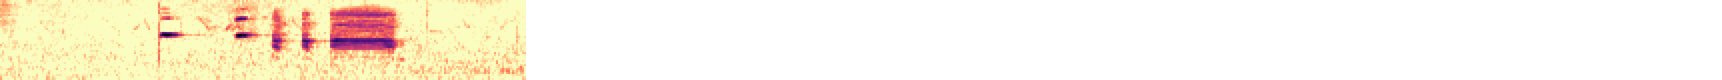
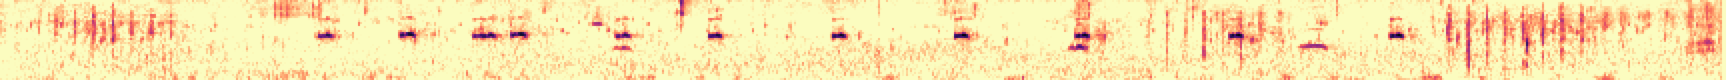
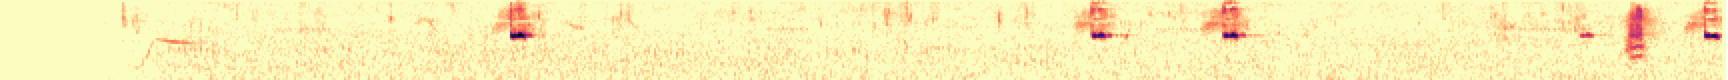
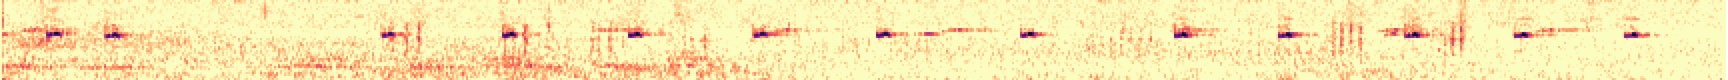
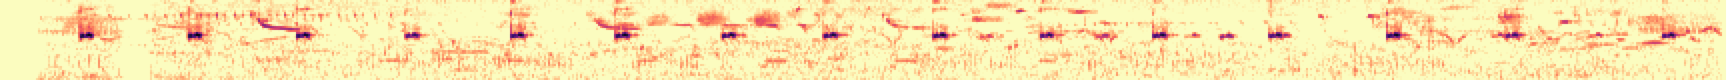
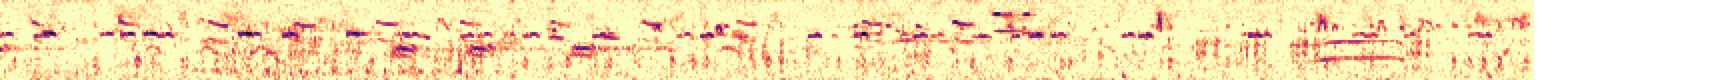
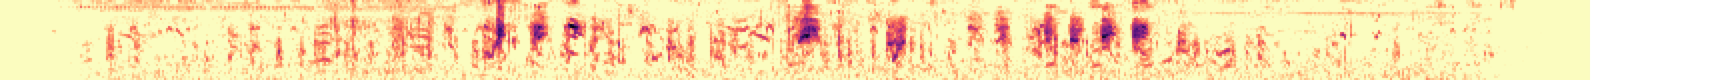
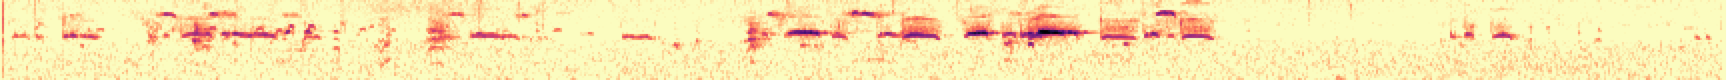
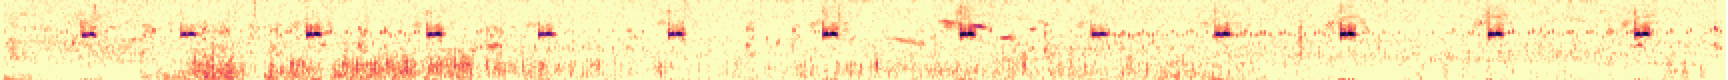
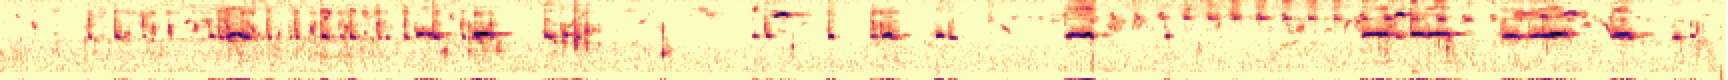

peak memory: 755.70 MiB, increment: 104.64 MiB

In [ ]:
%%memit -c
# Optimize perf
opt('warn', use='dask', scheduler='threads')  # Quiet + par + progress bars
# opt('warn', use='sync')
# opt('debug', use='sync')  # Verbose + sync + no progress bars
with ExitStack() as stack:
    stack.enter_context(cache_control(
        tags_fail_on_miss=['rec'],  # Require warmed cache for 'rec' funcs
        tags_refresh=['recs'],  # Measure un-warmed cache for 'recs' funcs
    ))
    display(
        xc_similar_html(
            sort='d_fc',
            sp_cols='species',

            # Perf bottlenecks
            #   - meta: O(n) cache hits
            #   - feat: O(n) cache hits
            #   - p:    O(n) sg.search.predict_proba [@cache would achieve perf ~between meta and feat, which is only ~2x speedup]
            xc_id=381417, n_total=10,   n_sp=1,     # t[4.0s] %m[ 123mb] n_recs[   32,0] p[meta 0.1 feat 0.1 p 0.1]
            # xc_id=381417, n_total=10,   n_sp=10,    # t[7.1s] %m[ 107mb] n_recs[  717,0] p[meta 0.8 feat 1.5 p 0.5]
            # xc_id=381417, n_total=10,   n_sp=40,    # t[ 25s] %m[ 300mb] n_recs[ 3879,1] p[meta 3.7 feat 7.6 p 5.1]
            # xc_id=381417, n_total=10,   n_sp=80,    # t[ 51s] %m[ 310mb] n_recs[ 8203,1] p[meta 7.6 feat  18 p  14]
            # xc_id=381417, n_total=10,   n_sp=160,   # t[111s] %m[ 637mb] n_recs[15284,1] p[meta  14 feat  36 p  42]
            # xc_id=381417, n_total=10,   n_sp=None,  # t[192s] %m[1186mb] n_recs[27033,2] p[meta  25 feat  62 p  72]

            # NOTE n_sp=None -> 27035/35233 recs because quality='ab'
            # TODO TODO Then continue [from notes]

            # view=False,  # For .pipe(n_recs_by_sp_quality): disable html view else junk .species values
        )
        # .pipe(n_recs_by_sp_quality)
    )

to_paths_sliced: [

] |   0% (1) |  0.0s

to_paths_sliced: [

#################################################################################

] | 100% (1) |  0.1s

to_paths_sliced: [

] |   0% (1372) |  0.0s

to_paths_sliced: [

##############################################################################

] | 100% (1372) |  0.1s

f: [

] |   0% (1372) |  0.0s

f: [

############################################################################################

] | 100% (1372) |  0.1s

d_f2: [

] |   0% (1372) |  0.0s

d_f2: [

#########################################################################################

] | 100% (1372) |  0.1s

d_fc: [

] |   0% (1372) |  0.0s

d_fc: [

#########################################################################################

] | 100% (1372) |  0.1s

p: [

] |   0% (1372) |  0.0s

p: [

] |   0% (1372) |  0.1s

p: [

] |   0% (1372) |  0.2s

p: [

] |   0% (1372) |  0.3s

p: [

] |   0% (1372) |  0.4s

p: [

] |   0% (1372) |  0.5s

p: [

] |   0% (1372) |  0.6s

p: [

] |   0% (1372) |  0.7s

p: [

] |   0% (1372) |  0.8s

p: [

] |   0% (1372) |  1.0s

p: [

] |   0% (1372) |  1.1s

p: [

] |   0% (1372) |  1.2s

p: [

] |   0% (1372) |  1.3s

p: [

] |   0% (1372) |  1.4s

p: [

] |   0% (1372) |  1.5s

p: [

] |   0% (1372) |  1.6s

p: [

] |   0% (1372) |  1.7s

p: [

############################################################################################

] | 100% (1372) |  1.8s

d_p2: [

] |   0% (1372) |  0.0s

d_p2: [

#########################################################################################

] | 100% (1372) |  0.1s

d_pc: [

] |   0% (1372) |  0.0s

d_pc: [

#########################################################################################

] | 100% (1372) |  0.1s

audio: [

] |   0% (20) |  0.0s

audio: [

] |   0% (20) |  0.1s

audio: [

####################################                                                      

] |  40% (20) |  0.2s

audio: [

#####################################################################################     

] |  95% (20) |  0.4s

audio: [

##########################################################################################

] | 100% (20) |  0.5s

spectro: [

] |   0% (20) |  0.0s

spectro: [

########################################################################################

] | 100% (20) |  0.1s

plot_slice: [

] |   0% (20) |  0.0s

plot_slice: [

####                                                                                 

] |   5% (20) |  0.1s

plot_slice: [

######################################                                               

] |  45% (20) |  0.2s

plot_slice: [

########################################################################             

] |  85% (20) |  0.3s

plot_slice: [

#####################################################################################

] | 100% (20) |  0.4s

xc                                                                                                          xc_id                                                  d_slp                                                  d_f2                                                   d_p2                                                    d_fc                                                   d_pc                                                                                                                                          com_name                                                      slice quality                                                               date_time                                                  type  subspecies                                                         background_species                                                        recordist elevation                                                                                                                                                                                                    place                                                                                                                                                                                                  remarks bird_seen playback_used  duration_s
0   \n                    <a href="https://www.xeno-canto.org/348142">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=348142) }}">348142</a>\n                  <a href="{{ req_query_with(sort='d_slp') }}" >0.0</a>  <a href="{{ req_query_with(sort='d_f2') }}" >0.0</a>   <a href="{{ req_query_with(sort='d_p2') }}" >0.0</a>    <a href="{{ req_query_with(sort='d_fc') }}" >0.0</a>   <a href="{{ req_query_with(sort='d_pc') }}" >0.0</a>  \n                    <a href="{{ req_href('/recs/xc/species')(species='PSFL') }}" title="PSFL"  >Pacific-slope Flycatcher</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       A  \n                2001-06-15<br/>\n                05:25\n                           df_cell_str(value='male position note')  cineritius                                df_cell_str(value='MOCH DEJU WBNU<br>PYNU')  \n                Richard E. Webster<br/>by-nc-sa\n                2300 m  df_cell_str(value='\n                La Corona Arriba, Sierra San Pedro Martir, Baja California, Mexico<br/>\n                <a href="https://www.google.com/maps/place/30.98,-115.504/@30.98,-115....                                                                                                                     df_cell_str(value='territory No 1 recorded here, 4th recording; male position note')       yes            no      10.031
1   \n                    <a href="https://www.xeno-canto.org/348145">XC</a>\n                  \n                    <a href="{{ req_href('/recs/xc/similar')(xc_id=348145) }}">348145</a>\n                  <a href="{{ req_query_with(sort='d_slp') }}" >2.7</a>   <a href="{{ req_query_with(sort='d_f2') }}" >34</a>  <a href="{{ req_query_with(sort='d_p2') }}" >0.12</a>  <a href="{{ req_query_with(sort='d_fc') }}" >0.069</a>  <a href="{{ req_query_with(sort='d_pc') }}" >0.26</a>  \n                    <a href="{{ req_href('/recs/xc/species')(species='PSFL') }}" title="PSFL"  >Pacific-slope Flycatcher</a>\n                  df_cell_display(value=<IPython.core.display.HTML object>)       B  \n                2001-06-15<br/>\n                05:35\n                           df_cell_str(value='male position note')  cineritius                                        df_cell_str(value='WBNU PSFL PYNU')  \n                Richard E. Webster<br/>by-nc-sa\n                2300 m  df_cell_str(value='\n                La Corona Arriba, Sierra San Pedro Martir, Baja California, Mexico<br/>\n                <a href="https://www.google.com/maps/place/30.98,-115.504/@30.98,-115....                                                                      
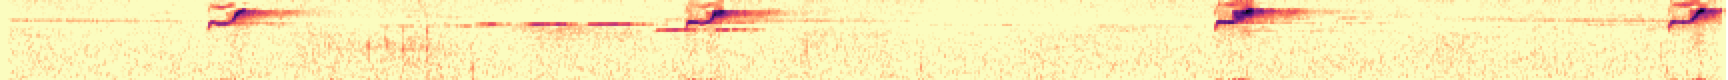
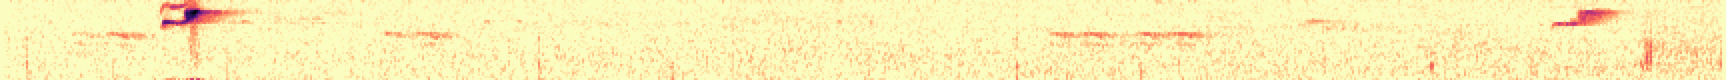
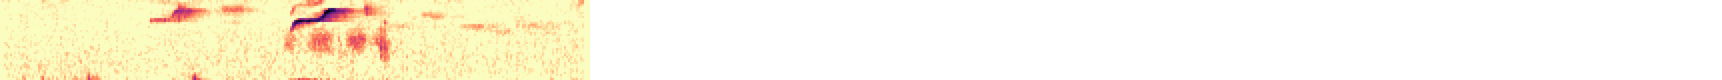
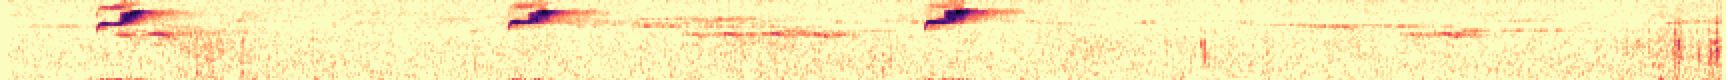
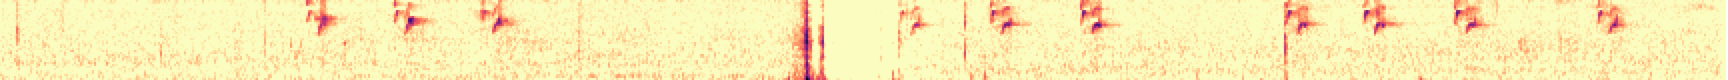
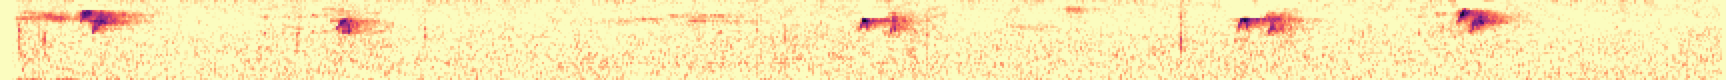
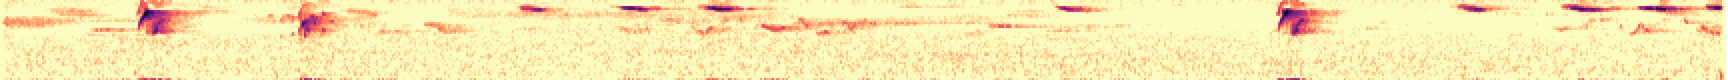
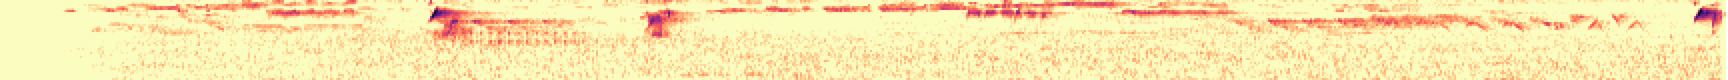
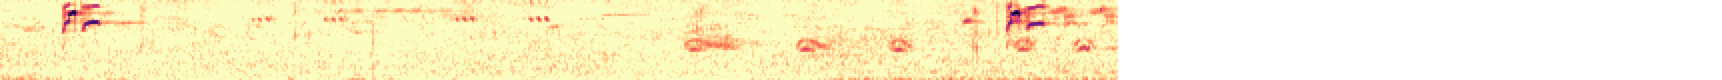
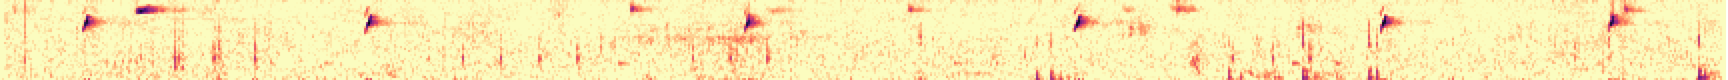
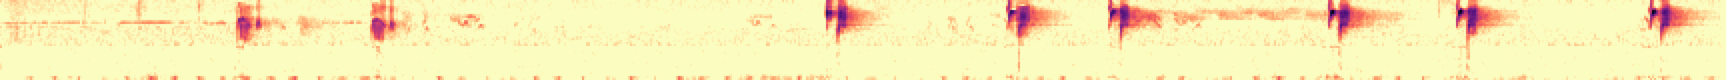
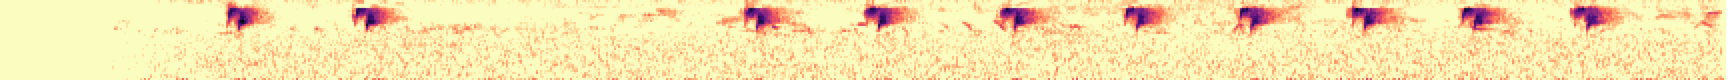
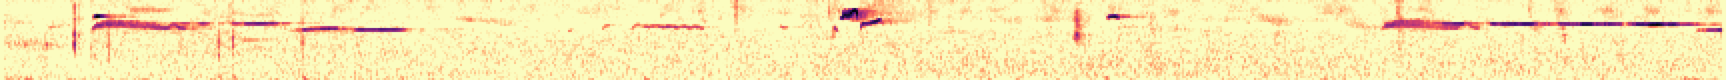
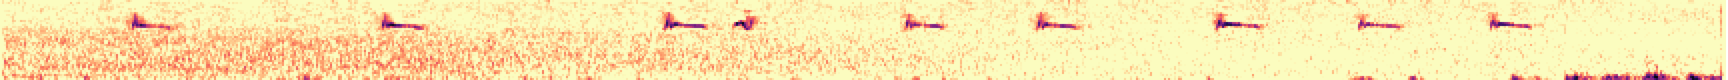
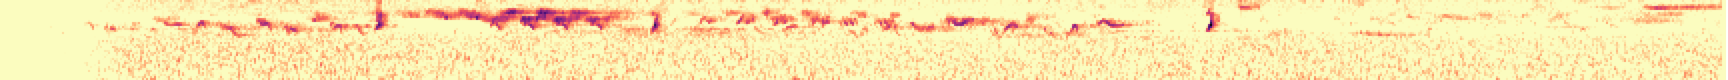
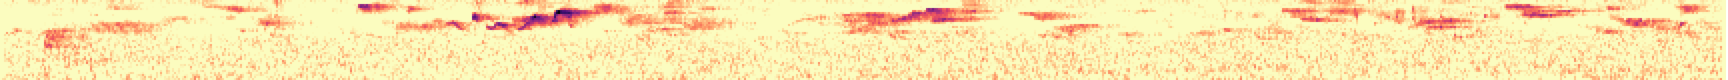
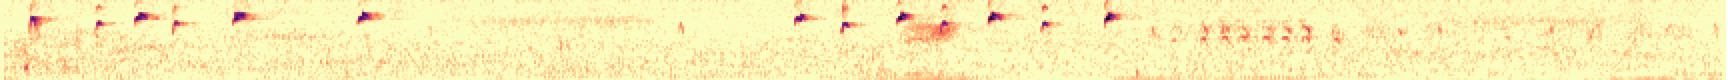
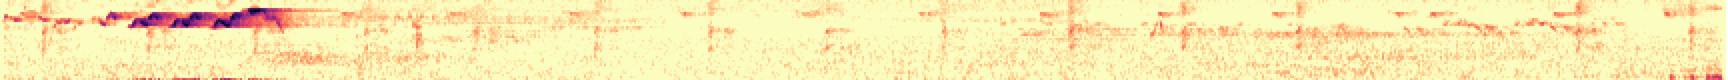
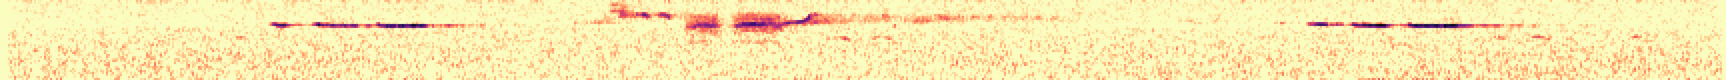
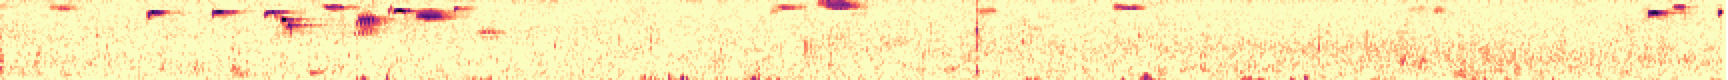

In [ ]:
# Simulate /similar
opt('warn', use='dask', scheduler='threads')  # Quiet + par + progress bars
xc_similar_html(
    # view=False,
    sort='d_pc',
    # sp_cols='species',
    sp_cols='com_name',
    n_total=20,

    # xc_id=381417,
    # xc_id=173272,  # LOSH
    xc_id=348142,  # PSFL

    # n_sp=1,
    # n_sp=3,
    n_sp=10,
    # n_sp=40,
    # n_sp=80,
    # n_sp=160,
    # n_sp=None,

    n_sp_recs=3,

)